In [ ]:
#  Importing all the important dependencies/libraries

import numpy as np
# for making data frames
import pandas as pd
# for making the graphs
import matplotlib.pyplot as plt
# for plotting we use other library
import seaborn as sns
# other import library
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# Importing the California House Price data
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)
# house_price_dataset.head()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# loading the house_price_dataset into pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [ ]:
# print the first five rows of our dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# add the target array or the house prices to the dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
# print the first five rows of our dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(house_price_dataframe.shape)

(20640, 9)


In [ ]:
# checking for any missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
# Now as there are no missing values , we can carry on to measure the statistical measures of the above dataframe

house_price_dataframe.describe()

# 25% of the values are less than 2.563400
# 50% of the value are less than 3.534800

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Understanding the correlation between the various features in the dataset
# 1) postive correlation , both change simultaneusly
# 2) negative correlation , both change opposingly

correlation = house_price_dataframe.corr()

<Axes: >

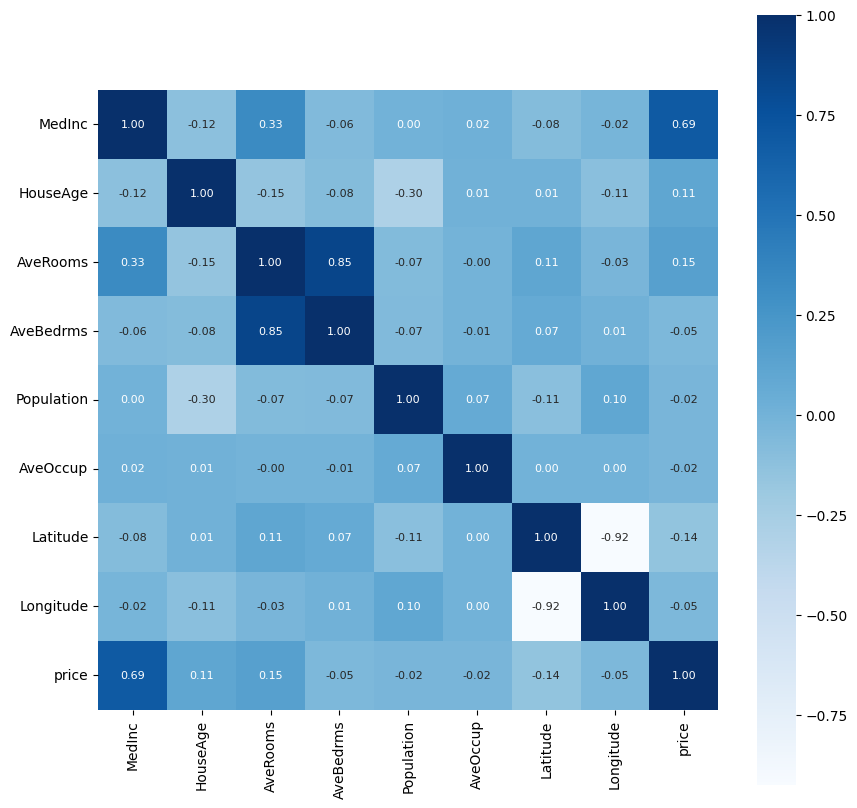

In [ ]:
# plotting a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
# separating the features and the prices
X = house_price_dataframe.drop(columns='price',axis=1)
Y = house_price_dataframe['price']
print(X)
print(Y)
print(X.shape)
print(Y.shape)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
# splitting the data into the training data and test data/\
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
# making and training the model on training set
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Accuracy of the model on training set? No , we can't use that here , instead we'll calculate the errors
training_data_prediction = regressor.predict(X_train)



In [ ]:
print(training_data_prediction)
print(training_data_prediction.shape)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]
(16512,)


In [ ]:
# R squared error
score1 = metrics.r2_score(Y_train,training_data_prediction)

# Mean squared error
score2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error = " ,score1)
print("MAE = ", score2)

R squared error =  0.943650140819218
MAE =  0.1933648700612105


In [ ]:
# As these values are very less ,the model predicts well
# Now lets test on the test data
test_data_prediction = regressor.predict(X_test)
# R squared error
score3 = metrics.r2_score(Y_test,test_data_prediction)

# Mean squared error
score4 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error = " ,score3)
print("MAE = ", score4)

R squared error =  0.8338000331788725
MAE =  0.3108631800268186


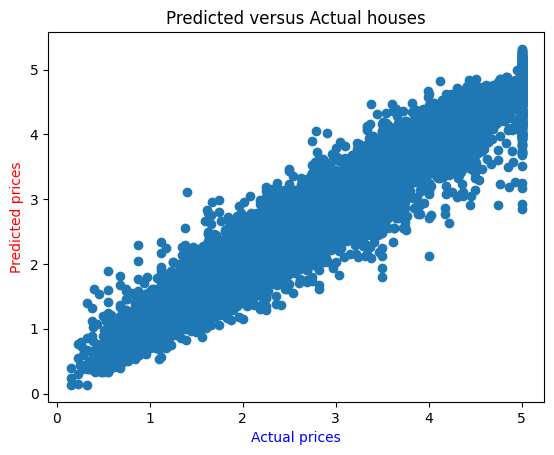

In [ ]:
# Our model is performing good on test data also

# Visualising the actual & predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices',color='b')
plt.ylabel('Predicted prices',color='r')
plt.title('Predicted versus Actual houses')
plt.show()

# All the data points are pretty close in actual & predicted prices

In [ ]:
print("Please BG 20LPA+ ki placement lagwaado!")


Please BG 20LPA+ ki placement lagwaado!


In [ ]:
print("Please bhagwaan ji 😭😭")

Please bhagwaan ji 😭😭
